In [2]:
import pandas as pd
import torch
import os
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm
import matplotlib.pyplot as plt

result_dir = "H:/JHMDB/models"

# all models

In [7]:
results = {}
for m in tqdm(os.listdir(f"{result_dir}")):

    # print(m)

    max_acc = 0
    max_train_acc = 0

    for e in os.listdir(f"{result_dir}/{m}"):

        if e == 'model': continue

        res = torch.load(f"{result_dir}/{m}/{e}", map_location=torch.device('cpu'))
        acc = accuracy_score(res['val_actual'], res['val_predicted'])
        train_acc = accuracy_score(res['train_actual'], res['train_predicted'])

        if acc > max_acc: max_acc = acc
        if train_acc > max_train_acc: max_train_acc = train_acc

    results[m] = max_acc

    # print(max_acc)
    # print(max_train_acc)

s = {k: v for k, v in sorted(results.items(), key=lambda item: item[1])}
for k in s.keys():
    print(f"{k} - {s[k]}")

100%|██████████| 30/30 [01:13<00:00,  2.45s/it]

m_test - 0
m_4.7 - 0.09328358208955224
m_5.10 - 0.1044776119402985
m_5.5 - 0.11567164179104478
m_5.8 - 0.11567164179104478
m_5.6 - 0.12313432835820895
m_4.9.5 - 0.13432835820895522
m_5.7 - 0.13432835820895522
m_4.9.10 - 0.13805970149253732
m_5.3 - 0.13805970149253732
m_4.9.4 - 0.1417910447761194
m_4.10 - 0.14925373134328357
m_5.9 - 0.14925373134328357
m_4.11 - 0.16044776119402984
m_4.9.8 - 0.16044776119402984
m_4.9.9 - 0.16791044776119404
m_4.4 - 0.17164179104477612
m_4.8 - 0.17537313432835822
m_4.9.2 - 0.17537313432835822
m_4.9 - 0.1791044776119403
m_4.9.12 - 0.1828358208955224
m_4.9.6 - 0.1865671641791045
m_5.1 - 0.1865671641791045
m_4.6 - 0.19402985074626866
m_4.9.11 - 0.19776119402985073
m_5.0 - 0.20149253731343283
m_5.4 - 0.20149253731343283
m_5.2 - 0.20522388059701493
m_4.9.7 - 0.2126865671641791
m_4.9.3 - 0.22014925373134328


# one model

In [8]:
#Change this to the version you want
VERSION = "5.4.1"

model_path = f"{result_dir}/m_{VERSION}"

training_accs = []
testing_accs = []

max_testing_acc = 0

for e in tqdm(os.listdir(model_path)):

    if e == 'model' : continue

    res = torch.load(f"{model_path}/{e}", map_location=torch.device('cpu'))

    training_accs.append(accuracy_score(res['train_actual'], res['train_predicted']))
    testing_accs.append(accuracy_score(res['val_actual'], res['val_predicted']))

    if accuracy_score(res['val_actual'], res['val_predicted']) > max_testing_acc:
        max_conf_matrix = confusion_matrix(res['val_actual'], res['val_predicted'])

100%|██████████| 70/70 [00:01<00:00, 66.29it/s]


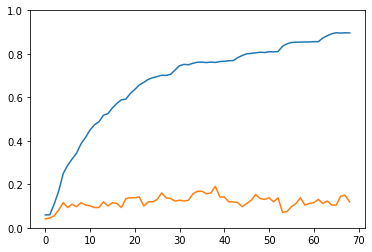

In [9]:
plt.ylim(0,1)
plt.plot(range(len(training_accs)), training_accs)
plt.plot(range(len(testing_accs)), testing_accs)

In [60]:
max(testing_accs)

0.13805970149253732

In [38]:
max_conf_matrix

array([[0, 0, 1, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1],
       [1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 2, 1, 2, 0, 0, 2, 1],
       [0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 2, 0, 2],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 2, 0, 0, 1, 0],
       [1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 2],
       [0, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 2, 0, 2],
       [0, 3, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0, 1, 2, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0],
       [0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 7, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 2, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 4, 1, 1, 0, 0],
       [1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 4, 0, 2, 0, 1,